# Linear Regression

In [1]:
from tensor_module import Tensor, Device
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

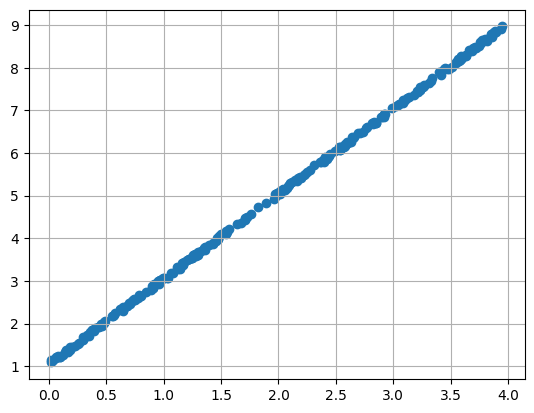

In [2]:
n_sample, n_feature = 256, 1
X = np.random.random((n_sample, n_feature)) * 4.0
noise = np.random.random((n_sample, 1)) * 0.1
Y = 2 * X + 1 + noise

X_a, Y_a = X.copy(), Y.copy()

plt.scatter(X, Y)
plt.grid()
plt.show()
plt.close()


Loss function: $L = \frac{1}{2m}\sum_{1}^{m} [Xw + b - y]^2$.

In [3]:
X = Tensor.from_numpy(X)
Y = Tensor.from_numpy(Y)

w = Tensor.zeros((n_feature, 1), Device.CPU)
b = Tensor.zeros((1, ), Device.CPU)

In [6]:
loss_tol = 1e-4
lr = 1e-2
max_iter: int = 100
iter: int = 0

while True:
    l = Tensor.dot(X, w) + b - Y
    loss: float = Tensor.sum_all(l * l) / 2 / len(X)

    if loss < loss_tol or iter > max_iter:
        break
    dw = Tensor.dot(Tensor.transpose(X), l)
    dw *= (lr / len(X))
    assert dw.shape == w.shape
    w -= dw

    db = Tensor.sum_all(l)
    db *= (lr / len(X))
    b -= db

    iter += 1

In [7]:
print(w.to_list(), b.to_list())

[[2.058830976486206]] [0.8996129631996155]


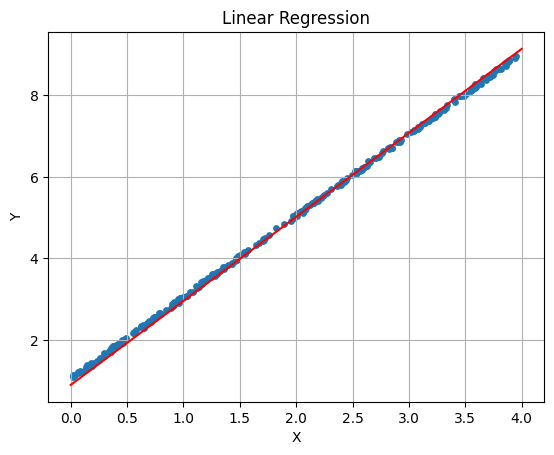

/tmp/ipykernel_2811914/678616560.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [8]:
plt.scatter( X_a, Y_a, sizes=np.array([15]) )
plt.grid()

# plot wx + b
w = w.to_list()[0]
b = b.to_list()[0]
x = np.linspace(0, 4, 100)
y = w * x + b
plt.plot(x, y, color='red', label='wx + b')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.legend()
plt.close()